In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.DataFrame()

In [5]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [6]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [7]:
# scatter plot

<AxesSubplot:xlabel='X1', ylabel='X2'>

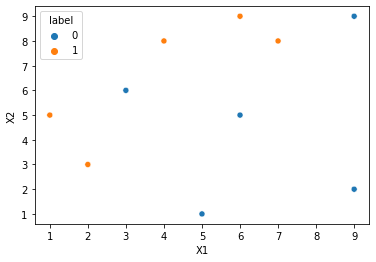

In [144]:
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])


In [145]:
#create sample weights
#1/no of rows=
#1/df.shape

In [146]:
df['sample_weight']=1/df.shape[0]

In [147]:
df

,X1,X2,label,sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [148]:
#create DT from sklearn
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier(max_depth=1)

In [9]:
#segreegate the colms now
X=X=df.iloc[:,0:2]
np.array(X)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [10]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [11]:
y=df.iloc[:,2]

In [12]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

# DT1

In [153]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

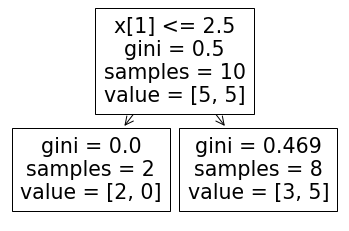

In [154]:
from sklearn.tree import plot_tree
plot_tree(DT1)

C:\Users\Shubham Borse\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

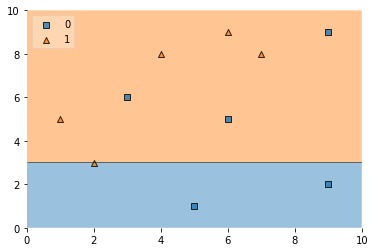

In [155]:
plot_decision_regions(np.array(X),np.array(y),clf=DT1,legend=2)

In [156]:
# from above fig we can see that 3 red pts are missclassified

In [157]:
df['y_pred']=DT1.predict(X)

In [158]:
df

,X1,X2,label,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [159]:
#here we get 3 missclassified pts are 8,6,2

In [160]:
#now calculate performance of the stump

In [161]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [162]:
alpha1=calculate_model_weight(0.3)  # 3 missclassified points
alpha1

0.42364893019360184

In [163]:
# calculate the updated weight

def updated_row_weight(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['sample_weight']*np.exp(-alpha)
    else:
        return row['sample_weight']*np.exp(alpha)

In [164]:
df['updated_weights']=df.apply(updated_row_weight,axis=1)

In [165]:
df

,X1,X2,label,sample_weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [166]:
# from above df we get that wts of missclassified points are increased

In [167]:
#normalize the updated_weights

In [168]:
df['sample_weight'].sum()

1.0

In [169]:
df['updated_weights'].sum()

0.9165153319682015

In [170]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [171]:
df

,X1,X2,label,sample_weight,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [172]:
df['normalized_weights'].sum()

1.0

In [173]:
np.cumsum(df['normalized_weights'])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.761967
8    0.928525
9    1.000000
Name: normalized_weights, dtype: float64

In [174]:
# create bins
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

df[['X1','X2','label','sample_weight','y_pred','updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,sample_weight,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [175]:
# for missclassified points we get large bin size

In [176]:
#now take a random sample ranges bet 0-1 
#so that we get data for next DT

for i in range(df.shape[0]):
    a=np.random.random()
    print(a)
    for index,row in df.iterrows():
        print(index)
        print(row)

0.029556140265277753
0
X1                    1.000000
X2                    5.000000
label                 1.000000
sample_weight         0.100000
y_pred                1.000000
updated_weights       0.065508
normalized_weights    0.071475
cumsum_upper          0.071475
cumsum_lower          0.000000
Name: 0, dtype: float64
1
X1                    2.000000
X2                    3.000000
label                 1.000000
sample_weight         0.100000
y_pred                1.000000
updated_weights       0.065508
normalized_weights    0.071475
cumsum_upper          0.142950
cumsum_lower          0.071475
Name: 1, dtype: float64
2
X1                    3.000000
X2                    6.000000
label                 0.000000
sample_weight         0.100000
y_pred                1.000000
updated_weights       0.152653
normalized_weights    0.166559
cumsum_upper          0.309508
cumsum_lower          0.142950
Name: 2, dtype: float64
3
X1                    4.000000
X2                    8.000000


In [177]:
indexes=[]

for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
            indexes.append(index)       

In [178]:
indexes

[5, 1, 5, 6, 8, 8, 8, 2, 5, 3]

In [179]:
df.iloc[indexes]

,X1,X2,label,sample_weight,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508


# DT2

In [180]:
second_df=df.iloc[indexes][['X1','X2','label','sample_weight']]

In [181]:
second_df

,X1,X2,label,sample_weight
5,6,9,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1


In [182]:
#create DT2 from sklearn using above data
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(max_depth=1)

In [183]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [184]:
DT2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

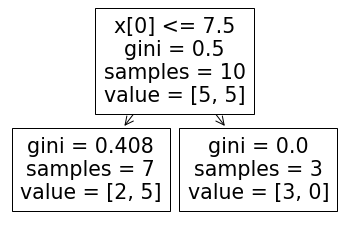

In [185]:
plot_tree(DT2)

<AxesSubplot:>

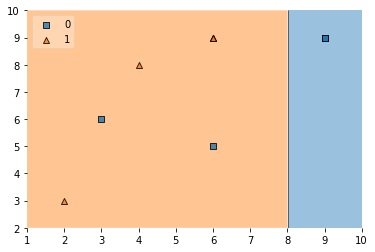

In [186]:
plot_decision_regions(X,y,clf=DT2,legend=2)

In [187]:
second_df['y_pred']=DT2.predict(X)

In [188]:
second_df

,X1,X2,label,sample_weight,y_pred
5,6,9,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1


In [189]:
#here we get two mc points

In [190]:
#performanbce of stump

alpha2=calculate_model_weight(0.2)

In [191]:
alpha2

0.6931471805599453

In [192]:
#update the weight
def updated_row_weight(row,alpha=0.69):
    if row['label']==row['y_pred']:
        return row['sample_weight']*np.exp(-alpha)
    else:
        return row['sample_weight']*np.exp(alpha)

In [193]:
second_df['updated_weight']=second_df.apply(updated_row_weight,axis=1)

In [194]:
second_df

,X1,X2,label,sample_weight,y_pred,updated_weight
5,6,9,1,0.1,1,0.050158
1,2,3,1,0.1,1,0.050158
5,6,9,1,0.1,1,0.050158
6,6,5,0,0.1,1,0.199372
8,9,9,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
2,3,6,0,0.1,1,0.199372
5,6,9,1,0.1,1,0.050158
3,4,8,1,0.1,1,0.050158


In [195]:
second_df['normalized_weights']=second_df['updated_weight']/second_df['updated_weight'].sum()

In [196]:
# create bins
second_df['cumsum_upper']=np.cumsum(second_df['normalized_weights'])

second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_weights']

second_df[['X1','X2','label','sample_weight','y_pred','updated_weight','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,sample_weight,y_pred,updated_weight,normalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.050158,0.062697,0.000000,0.062697
1,2,3,1,0.1,1,0.050158,0.062697,0.062697,0.125393
5,6,9,1,0.1,1,0.050158,0.062697,0.125393,0.188090
6,6,5,0,0.1,1,0.199372,0.249213,0.188090,0.437303
8,9,9,0,0.1,0,0.050158,0.062697,0.437303,0.500000
8,9,9,0,0.1,0,0.050158,0.062697,0.500000,0.562697
8,9,9,0,0.1,0,0.050158,0.062697,0.562697,0.625393
2,3,6,0,0.1,1,0.199372,0.249213,0.625393,0.874607
5,6,9,1,0.1,1,0.050158,0.062697,0.874607,0.937303
3,4,8,1,0.1,1,0.050158,0.062697,0.937303,1.000000


In [197]:
for i in range(second_df.shape[0]):
    a=np.random.random()
    print(a)
    for index,row in second_df.iterrows():
        print(index)
        print(row)

0.07433242594467071
5
X1                    6.000000
X2                    9.000000
label                 1.000000
sample_weight         0.100000
y_pred                1.000000
updated_weight        0.050158
normalized_weights    0.062697
cumsum_upper          0.062697
cumsum_lower          0.000000
Name: 5, dtype: float64
1
X1                    2.000000
X2                    3.000000
label                 1.000000
sample_weight         0.100000
y_pred                1.000000
updated_weight        0.050158
normalized_weights    0.062697
cumsum_upper          0.125393
cumsum_lower          0.062697
Name: 1, dtype: float64
5
X1                    6.000000
X2                    9.000000
label                 1.000000
sample_weight         0.100000
y_pred                1.000000
updated_weight        0.050158
normalized_weights    0.062697
cumsum_upper          0.188090
cumsum_lower          0.125393
Name: 5, dtype: float64
6
X1                    6.000000
X2                    5.000000
l

In [228]:
indexes=[]

for i in range(second_df.shape[0]):
    a=np.random.random()
    for index,row in second_df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
            indexes.append(index)       

In [229]:
indexes

[2, 5, 6, 6, 1, 2, 2, 6, 6, 2]

In [230]:
second_df.iloc[indexes]

,X1,X2,label,sample_weight,y_pred,updated_weight,normalized_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.050158,0.062697,0.188090,0.125393
8,9,9,0,0.1,0,0.050158,0.062697,0.562697,0.500000
8,9,9,0,0.1,0,0.050158,0.062697,0.625393,0.562697
8,9,9,0,0.1,0,0.050158,0.062697,0.625393,0.562697
1,2,3,1,0.1,1,0.050158,0.062697,0.125393,0.062697
5,6,9,1,0.1,1,0.050158,0.062697,0.188090,0.125393
5,6,9,1,0.1,1,0.050158,0.062697,0.188090,0.125393
8,9,9,0,0.1,0,0.050158,0.062697,0.625393,0.562697
8,9,9,0,0.1,0,0.050158,0.062697,0.625393,0.562697
5,6,9,1,0.1,1,0.050158,0.062697,0.188090,0.125393


# DT3

In [231]:
third_df=second_df.iloc[indexes][['X1','X2','label','sample_weight']]

In [232]:
third_df

,X1,X2,label,sample_weight
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1


In [233]:
third_df=df.iloc[indexes][['X1','X2','label','sample_weight']]

In [234]:
#create DT3 from sklearn using above data
from sklearn.tree import DecisionTreeClassifier
DT3=DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

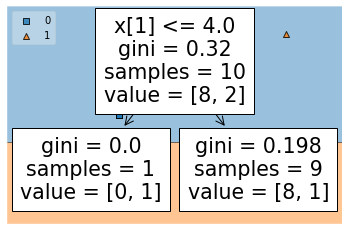

In [235]:
X=third_df.iloc[:,0:2].values
y=third_df.iloc[:,2].values

DT3.fit(X,y)
plot_tree(DT3)
plot_decision_regions(X,y,clf=DT3,legend=2)

In [236]:
third_df['y_pred']=DT3.predict(X)
third_df

,X1,X2,label,sample_weight,y_pred
2,3,6,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0


In [251]:
#performanbce of stump
alpha3=calculate_model_weight(0.1)
alpha3

1.0986122886681098

In [261]:
#update the weight
def updated_row_weight(row,alpha=0.1):
    if row['label']==row['y_pred']:
        return row['sample_weight']*np.exp(-alpha)
    else:
        return row['sample_weight']*np.exp(alpha)

In [262]:
third_df['updated_weight']=third_df.apply(updated_row_weight,axis=1)
third_df

third_df['normalized_weights']=third_df['updated_weight']/third_df['updated_weight'].sum()

In [263]:
# create bins
third_df['cumsum_upper']=np.cumsum(third_df['normalized_weights'])

third_df['cumsum_lower']=third_df['cumsum_upper']-third_df['normalized_weights']

third_df[['X1','X2','label','sample_weight','y_pred','updated_weight','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,sample_weight,y_pred,updated_weight,normalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.090484,0.097834,0.000000,0.097834
5,6,9,1,0.1,0,0.110517,0.119495,0.097834,0.217329
6,6,5,0,0.1,0,0.090484,0.097834,0.217329,0.315162
6,6,5,0,0.1,0,0.090484,0.097834,0.315162,0.412996
1,2,3,1,0.1,1,0.090484,0.097834,0.412996,0.510830
2,3,6,0,0.1,0,0.090484,0.097834,0.510830,0.608664
2,3,6,0,0.1,0,0.090484,0.097834,0.608664,0.706498
6,6,5,0,0.1,0,0.090484,0.097834,0.706498,0.804332
6,6,5,0,0.1,0,0.090484,0.097834,0.804332,0.902166
2,3,6,0,0.1,0,0.090484,0.097834,0.902166,1.000000


In [264]:
for i in range(third_df.shape[0]):
    a=np.random.random()
    print(a)
    for index,row in third_df.iterrows():
        print(index)
        print(row)

0.8959292762899562
2
X1                    3.000000
X2                    6.000000
label                 0.000000
sample_weight         0.100000
y_pred                0.000000
updated_weight        0.090484
normalized_weights    0.097834
cumsum_upper          0.097834
cumsum_lower          0.000000
Name: 2, dtype: float64
5
X1                    6.000000
X2                    9.000000
label                 1.000000
sample_weight         0.100000
y_pred                0.000000
updated_weight        0.110517
normalized_weights    0.119495
cumsum_upper          0.217329
cumsum_lower          0.097834
Name: 5, dtype: float64
6
X1                    6.000000
X2                    5.000000
label                 0.000000
sample_weight         0.100000
y_pred                0.000000
updated_weight        0.090484
normalized_weights    0.097834
cumsum_upper          0.315162
cumsum_lower          0.217329
Name: 6, dtype: float64
6
X1                    6.000000
X2                    5.000000
la

In [265]:
indexes=[]

for i in range(third_df.shape[0]):
    a=np.random.random()
    for index,row in third_df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
            indexes.append(index)       

In [266]:
indexes

[2, 2, 2, 5, 6, 5, 2, 6, 6, 2]

In [267]:
third_df.iloc[index]

X1                    6.000000
X2                    5.000000
label                 0.000000
sample_weight         0.100000
y_pred                0.000000
updated_weight        0.090484
normalized_weights    0.097834
cumsum_upper          0.315162
cumsum_lower          0.217329
Name: 6, dtype: float64

# Final prediction

In [268]:
#Result=alpha1*DT1+alpha2*DT2+alpha3*DT3

In [269]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 1.0986122886681098


In [270]:
query=np.array([[6,9]])

In [271]:
DT1.predict(query)

C:\Users\Shubham Borse\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [272]:
DT2.predict(query)

array([1], dtype=int64)

In [273]:
DT3.predict(query)

array([0], dtype=int64)

In [277]:
R=alpha1*(1)+alpha2*(1)+alpha3*(-1)

In [278]:
final_pred=np.sign(R)

1.0

In [291]:
#2)
query2=np.array([[4,8]])

In [292]:
DT1.predict(query)

C:\Users\Shubham Borse\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [293]:
DT2.predict(query2)

array([1], dtype=int64)

In [294]:
DT3.predict(query2)

array([0], dtype=int64)

In [295]:
R=alpha1*(1)+alpha2*(1)+alpha3*(-1)

In [296]:
#Returns an element-wise indication of the sign of a number.

final_pred=np.sign(R)

In [297]:
final_pred

1.0

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [13]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [14]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [15]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8